In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Step 1: Define transforms
train_transform = transforms.Compose([
    transforms.RandomCrop((25, 25)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_transform = transforms.Compose([
    transforms.CenterCrop((25, 25)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Step 2: Load datasets
train_dataset = datasets.MNIST(root='./mnist_data', train=True, download=True, transform=train_transform)
test_dataset = datasets.MNIST(root='./mnist_data', train=False, download=True, transform=test_transform)

# Step 3: Create data loaders
batch_size = 52
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [5]:
# Step 4: Define model
class MNISTClassifier(nn.Module):
    def __init__(self, X, Y):
        super(MNISTClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(25*25, X),
            nn.ReLU(),
            nn.Linear(X, Y),
            nn.ReLU(),
            nn.Linear(Y, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
# Step 5: Training function
def train(model, train_loader, test_loader, epochs, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)
        
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_loss = test_loss / len(test_loader)
        test_losses.append(test_loss)
        accuracy = 100 * correct / total
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')
    
    return train_losses, test_losses, accuracy


Training with X=64, Y=32
Epoch 1/10, Train Loss: 0.4652, Test Loss: 0.1655, Accuracy: 95.29%
Epoch 2/10, Train Loss: 0.2076, Test Loss: 0.1297, Accuracy: 95.91%
Epoch 3/10, Train Loss: 0.1652, Test Loss: 0.1096, Accuracy: 96.41%
Epoch 4/10, Train Loss: 0.1448, Test Loss: 0.1010, Accuracy: 96.84%
Epoch 5/10, Train Loss: 0.1299, Test Loss: 0.0896, Accuracy: 96.97%
Epoch 6/10, Train Loss: 0.1187, Test Loss: 0.0866, Accuracy: 97.30%
Epoch 7/10, Train Loss: 0.1128, Test Loss: 0.0763, Accuracy: 97.50%
Epoch 8/10, Train Loss: 0.1070, Test Loss: 0.0846, Accuracy: 97.41%
Epoch 9/10, Train Loss: 0.1058, Test Loss: 0.0866, Accuracy: 97.28%
Epoch 10/10, Train Loss: 0.0982, Test Loss: 0.0758, Accuracy: 97.64%


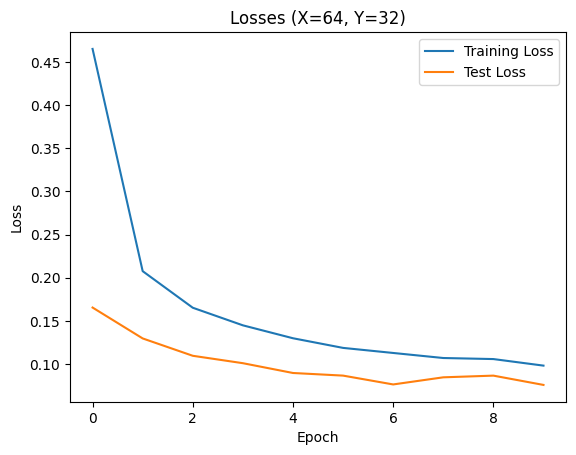


Training with X=128, Y=64
Epoch 1/10, Train Loss: 0.3763, Test Loss: 0.1386, Accuracy: 95.75%
Epoch 2/10, Train Loss: 0.1628, Test Loss: 0.0985, Accuracy: 96.76%
Epoch 3/10, Train Loss: 0.1261, Test Loss: 0.0825, Accuracy: 97.41%
Epoch 4/10, Train Loss: 0.1100, Test Loss: 0.0785, Accuracy: 97.59%
Epoch 5/10, Train Loss: 0.0981, Test Loss: 0.0646, Accuracy: 97.97%
Epoch 6/10, Train Loss: 0.0915, Test Loss: 0.0811, Accuracy: 97.50%
Epoch 7/10, Train Loss: 0.0848, Test Loss: 0.0585, Accuracy: 98.08%
Epoch 8/10, Train Loss: 0.0771, Test Loss: 0.0570, Accuracy: 98.12%
Epoch 9/10, Train Loss: 0.0773, Test Loss: 0.0628, Accuracy: 97.96%
Epoch 10/10, Train Loss: 0.0722, Test Loss: 0.0711, Accuracy: 97.80%


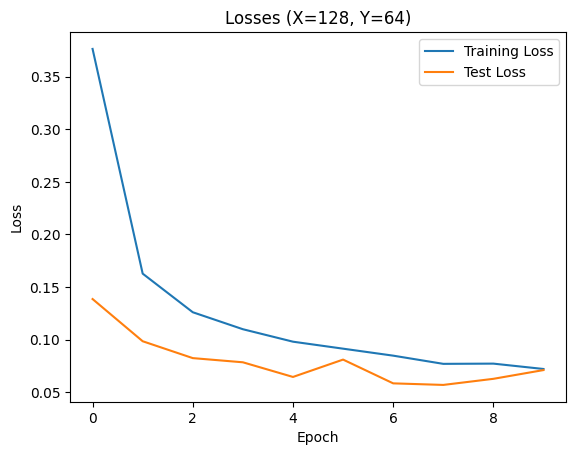


Training with X=256, Y=128
Epoch 1/10, Train Loss: 0.3094, Test Loss: 0.1059, Accuracy: 96.61%
Epoch 2/10, Train Loss: 0.1354, Test Loss: 0.0789, Accuracy: 97.44%
Epoch 3/10, Train Loss: 0.1047, Test Loss: 0.0770, Accuracy: 97.59%
Epoch 4/10, Train Loss: 0.0937, Test Loss: 0.0625, Accuracy: 97.96%
Epoch 5/10, Train Loss: 0.0836, Test Loss: 0.0619, Accuracy: 98.04%
Epoch 6/10, Train Loss: 0.0757, Test Loss: 0.0646, Accuracy: 97.95%
Epoch 7/10, Train Loss: 0.0713, Test Loss: 0.0536, Accuracy: 98.26%
Epoch 8/10, Train Loss: 0.0649, Test Loss: 0.0602, Accuracy: 98.08%
Epoch 9/10, Train Loss: 0.0644, Test Loss: 0.0563, Accuracy: 98.09%
Epoch 10/10, Train Loss: 0.0601, Test Loss: 0.0552, Accuracy: 98.21%


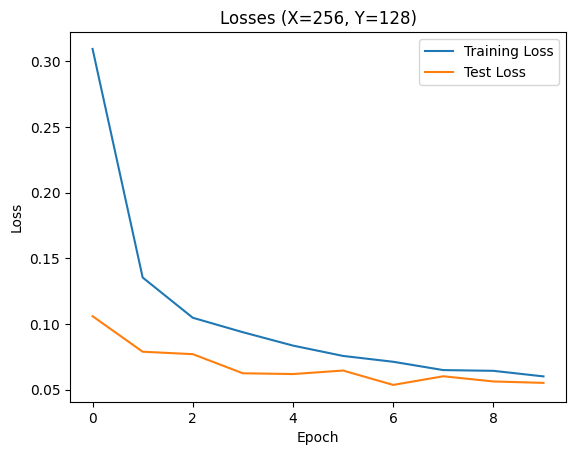


Training with X=512, Y=256
Epoch 1/10, Train Loss: 0.2727, Test Loss: 0.1303, Accuracy: 95.60%
Epoch 2/10, Train Loss: 0.1238, Test Loss: 0.0950, Accuracy: 97.11%
Epoch 3/10, Train Loss: 0.0999, Test Loss: 0.0819, Accuracy: 97.41%
Epoch 4/10, Train Loss: 0.0867, Test Loss: 0.0652, Accuracy: 98.02%
Epoch 5/10, Train Loss: 0.0796, Test Loss: 0.0621, Accuracy: 97.88%
Epoch 6/10, Train Loss: 0.0709, Test Loss: 0.0702, Accuracy: 97.62%
Epoch 7/10, Train Loss: 0.0646, Test Loss: 0.0588, Accuracy: 98.21%
Epoch 8/10, Train Loss: 0.0639, Test Loss: 0.0471, Accuracy: 98.50%
Epoch 9/10, Train Loss: 0.0590, Test Loss: 0.0592, Accuracy: 98.17%
Epoch 10/10, Train Loss: 0.0565, Test Loss: 0.0490, Accuracy: 98.46%


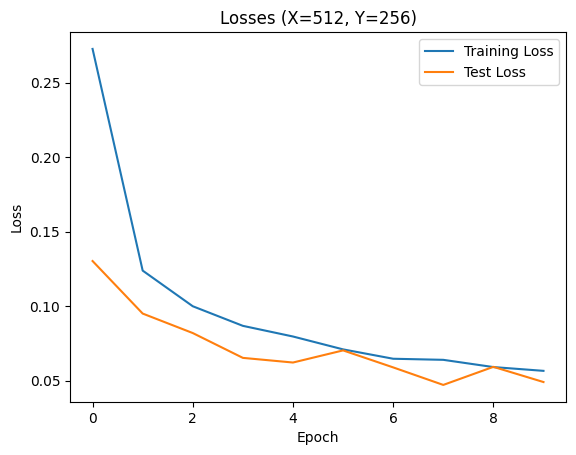

In [7]:
# Step 6: Evaluate different configurations
configurations = [
    {'X': 64, 'Y': 32},
    {'X': 128, 'Y': 64},
    {'X': 256, 'Y': 128},
    {'X': 512, 'Y': 256}
]

results = []

for config in configurations:
    print(f"\nTraining with X={config['X']}, Y={config['Y']}")
    model = MNISTClassifier(X=config['X'], Y=config['Y'])
    train_losses, test_losses, accuracy = train(model, train_loader, test_loader, epochs=10)
    results.append({
        'X': config['X'],
        'Y': config['Y'],
        'train_losses': train_losses,
        'test_losses': test_losses,
        'accuracy': accuracy
    })
    
    # Plot losses
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title(f"Losses (X={config['X']}, Y={config['Y']})")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



Best configuration: X=512, Y=256
Final test accuracy: 98.46%
Epoch 1/5, Train Loss: 0.2753, Test Loss: 0.1007, Accuracy: 96.74%
Epoch 2/5, Train Loss: 0.1254, Test Loss: 0.0777, Accuracy: 97.49%
Epoch 3/5, Train Loss: 0.0985, Test Loss: 0.0729, Accuracy: 97.60%
Epoch 4/5, Train Loss: 0.0859, Test Loss: 0.0709, Accuracy: 97.69%
Epoch 5/5, Train Loss: 0.0792, Test Loss: 0.0614, Accuracy: 97.97%


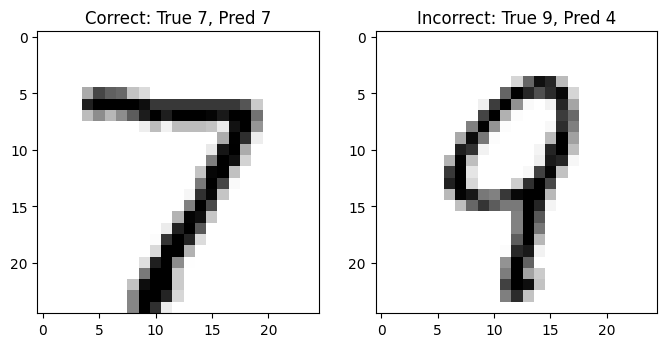

In [8]:
# Step 7: Display results
best_result = max(results, key=lambda x: x['accuracy'])
print(f"\nBest configuration: X={best_result['X']}, Y={best_result['Y']}")
print(f"Final test accuracy: {best_result['accuracy']:.2f}%")

# Display examples
model = MNISTClassifier(X=best_result['X'], Y=best_result['Y'])
train(model, train_loader, test_loader, epochs=5)  

correct_examples = []
incorrect_examples = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if len(correct_examples) < 1 and predicted[i] == labels[i]:
                correct_examples.append((images[i], labels[i], predicted[i]))
            if len(incorrect_examples) < 1 and predicted[i] != labels[i]:
                incorrect_examples.append((images[i], labels[i], predicted[i]))
            if len(correct_examples) >= 1 and len(incorrect_examples) >= 1:
                break
        if len(correct_examples) >= 1 and len(incorrect_examples) >= 1:
            break

def imshow(img):
    img = img.numpy().squeeze()
    plt.imshow(img, cmap='gray_r')
    plt.axis('on')

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
imshow(correct_examples[0][0])
plt.title(f'Correct: True {correct_examples[0][1]}, Pred {correct_examples[0][2]}')

plt.subplot(1, 2, 2)
imshow(incorrect_examples[0][0])
plt.title(f'Incorrect: True {incorrect_examples[0][1]}, Pred {incorrect_examples[0][2]}')
plt.show()